<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#docs" data-toc-modified-id="docs-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>docs</a></span><ul class="toc-item"><li><span><a href="#Q1:are-they-are-get-wrong-samingly???" data-toc-modified-id="Q1:are-they-are-get-wrong-samingly???-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Q1:are they are get wrong samingly???</a></span></li><li><span><a href="#aha" data-toc-modified-id="aha-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>aha</a></span></li></ul></li><li><span><a href="#sv" data-toc-modified-id="sv-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>sv</a></span><ul class="toc-item"><li><span><a href="#one-time" data-toc-modified-id="one-time-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>one time</a></span></li><li><span><a href="#many-times" data-toc-modified-id="many-times-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>many times</a></span></li><li><span><a href="#0-1-normal(guiyihua)" data-toc-modified-id="0-1-normal(guiyihua)-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>0-1 normal(guiyihua)</a></span></li><li><span><a href="#0-1normal-many-times" data-toc-modified-id="0-1normal-many-times-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>0-1normal many times</a></span></li></ul></li><li><span><a href="#vr" data-toc-modified-id="vr-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>vr</a></span></li><li><span><a href="#ka" data-toc-modified-id="ka-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>ka</a></span></li><li><span><a href="#mig" data-toc-modified-id="mig-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>mig</a></span><ul class="toc-item"><li><span><a href="#one-time" data-toc-modified-id="one-time-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>one time</a></span></li><li><span><a href="#many-times" data-toc-modified-id="many-times-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>many times</a></span></li></ul></li><li><span><a href="#draw" data-toc-modified-id="draw-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>draw</a></span></li><li><span><a href="#many-time-no-hot-with-mig" data-toc-modified-id="many-time-no-hot-with-mig-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>many time no hot with mig</a></span></li><li><span><a href="#Dalm" data-toc-modified-id="Dalm-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Dalm</a></span></li></ul></div>

## docs

### Q1:are they are get wrong samingly???
try the wrong index mig has:
4971 real 58

mig  43 20 2d

svrg:
	min_index_now 0
	min_index_now 2
	min_index_now 7
	min_index_now 22
	min_index_now 43
	min_index_now 58
	('rand_index', 4971)
	('randwho and index_min', 58, 58) 
    
 vrsgd：
 
 ### aha
    

## sv

### one time

In [44]:
### import things
import pandas as pd
import copy
import seaborn as sns
import time

### read form the csv doc
data_train = pd.read_csv('train.csv')  
data_test = pd.read_csv('test.csv')
### trans to array
train_array = np.array(data_train)
test_array = np.array(data_test)
###############hyper parameter
use_normA=0
use_normy=0
###############hyper parameter

###############functions

### determin the x_tilda
def cp(x):
    return copy.deepcopy(x)

### get w_tilda
def compute_w_tilda(iters_inner,w_prev,ww_prev,all_or_one='mix',alpha=0.8,beta=0.2):
    if all_or_one=='all':
        w_tilda=cp(ww_prev)/iters_inner
    elif all_or_one=='one':
        w_tilda=cp(w_prev)
    elif all_or_one=='mix':
        w_tilda= cp(alpha*(w_prev)+beta*(ww_prev/iters_inner))
    return w_tilda

### get the data matrix A
def get_A(use_normA,train_array):
    if use_normA==1: 
        A_before_norm = train_array
        A=np.empty(np.shape(A_before_norm))
        for i in range(np.shape(A_before_norm)[1]):
            temp=A_before_norm[:,i]/np.linalg.norm(A_before_norm[:,i])
            A[:,i]=temp
    else:
        A = train_array
    return A

### get alpha 
def compute_alpha(A,lamb):
    L_max=0.25*max(sum(A*A))
    alpha=0.15/(L_max+lamb)
    return alpha

def get_xx_0():
    xx_0=np.zeros([85*67,67])
    for i in range(67):
        xx_0[i*85:i*85+85][:,i]=1
    return xx_0

def compute_res(y,x_phi,lamb):
    return sum((y-A.dot(x_phi))*(y-A.dot(x_phi)))
    
def get_index_min(xx_0,w_tilda):
    res_min=1e9
    for m in range(np.shape(xx_0)[1]):
        temp=xx_0[:,m].reshape(5695,1)
        x_phi=w_tilda*temp
        res=compute_res(y,x_phi,lamb)
        if res<res_min:
            res_min=res
            index_min=m
    return index_min

def compute_sci(xx_0,w):
    w_l1=np.linalg.norm(w,ord=1)
    temp_max=1e-9
    for m in range(np.shape(xx_0)[1]):
        temp=xx_0[:,m].reshape(5695,1)
        x_phi=w_tilda*temp
        x_phi_l1=np.linalg.norm(x_phi,ord=1)
        if x_phi_l1>temp_max:
            temp_max=x_phi_l1
    return (67*(temp_max/w_l1)-1)/(67-1)



###############functions


### process the A to be norm or not
A=get_A(use_normA,train_array)
[d,n] = A.shape


### aha! same as the lambda, the L-1 norm coefficent
lamb=1e-3

### the learning rate 0.15/(the proxi-L constant)
alpha=compute_alpha(A,lamb)

### loops
iters_outer=20
iters_inner=3*d

### count the number bingo
right=0

xx_0=get_xx_0()

rand_index=4160 ##2383
rand_who=int(rand_index/85)

#### which y version you use, norm processed or the plain one 
if use_normy==1:
    temp_y = test_array[:,rand_index].reshape(d,1)
    y=np.empty(np.shape(temp_y))
    y=temp_y/np.linalg.norm(temp_y)
else:
    y=test_array[:,rand_index].reshape(d,1)

### initialize the two ws
w_prev=np.array(np.zeros([n,1]))
w_tilda=np.array(np.zeros([n,1]))



for i in range(iters_outer):
    print(i)
    mu=(-A.T).dot(y-A.dot(w_tilda))/d
    ##small loop
    for j in range(iters_inner):
        ### choose a rand one from d 
        idx=np.random.randint(0,d)
        ### A transpose, need reshape
        A_idx=A[idx].T.reshape(n,1)
        ### g_prev and tilda
        g_prev=(-A_idx).dot(y[idx]-(A[idx].reshape(1,n)).dot(w_prev)) 
        g_tilda=(-A_idx).dot(y[idx]-(A[idx].reshape(1,n)).dot(w_tilda)) 
        ### update the parameter
        w_prev=w_prev-alpha*(g_prev-g_tilda+mu)
        ### the soft thresholding
        temp=w_prev-lamb*alpha
        temp=(temp+abs(temp))/2
        w_prev=np.sign(w_prev)*temp
        if j%100==0:
            index_min=index_min=get_index_min(xx_0,w_prev)
            print('index_min',index_min)

        
    ### assign the w_tilda for another loop    
    w_tilda=copy.deepcopy(w_prev)

index_min=get_index_min(xx_0,w_tilda)

        
print(('rand_index',rand_index))
print(('randwho and index_min',rand_who,index_min))

if rand_who == index_min:
    right=right+1
    



0
index_min 45
index_min 51
index_min 51
index_min 51
index_min 51
index_min 21
index_min 21
index_min 21
index_min 21
index_min 21
index_min 21
index_min 21
index_min 21
index_min 21
index_min 21
index_min 21
index_min 21
index_min 21
index_min 21
index_min 21
index_min 21
index_min 21
index_min 21
index_min 21
index_min 21
index_min 21
index_min 21
index_min 21
index_min 21
index_min 21
index_min 21
1
index_min 21
index_min 21
index_min 21
index_min 21
index_min 21
index_min 21
index_min 21


KeyboardInterrupt: 

### many times

In [41]:
### import things
import pandas as pd
import copy
import seaborn as sns
import time

### read form the csv doc
data_train = pd.read_csv('train.csv')  
data_test = pd.read_csv('test.csv')
### trans to array
train_array = np.array(data_train)
test_array = np.array(data_test)
###############hyper parameter
use_normA=0
use_normy=0
###############hyper parameter

###############functions

### determin the x_tilda
def cp(x):
    return copy.deepcopy(x)

### get w_tilda
def compute_w_tilda(iters_inner,w_prev,ww_prev,all_or_one='mix',alpha=0.8,beta=0.2):
    if all_or_one=='all':
        w_tilda=cp(ww_prev)/iters_inner
    elif all_or_one=='one':
        w_tilda=cp(w_prev)
    elif all_or_one=='mix':
        w_tilda= cp(alpha*(w_prev)+beta*(ww_prev/iters_inner))
    return w_tilda

### get the data matrix A
def get_A(use_normA,train_array):
    if use_normA==1: 
        A_before_norm = train_array
        A=np.empty(np.shape(A_before_norm))
        for i in range(np.shape(A_before_norm)[1]):
            temp=A_before_norm[:,i]/np.linalg.norm(A_before_norm[:,i])
            A[:,i]=temp
    else:
        A = train_array
    return A

### get alpha 
def compute_alpha(A,lamb):
    L_max=0.25*max(sum(A*A))
    alpha=0.15/(L_max+lamb)
    return alpha

def get_xx_0():
    xx_0=np.zeros([85*67,67])
    for i in range(67):
        xx_0[i*85:i*85+85][:,i]=1
    return xx_0

def compute_res(y,x_phi,lamb):
    return sum((y-A.dot(x_phi))*(y-A.dot(x_phi)))
    
def get_index_min(xx_0,w_tilda):
    res_min=1e9
    for m in range(np.shape(xx_0)[1]):
        temp=xx_0[:,m].reshape(5695,1)
        x_phi=w_tilda*temp
        res=compute_res(y,x_phi,lamb)
        if res<res_min:
            res_min=res
            index_min=m
    return index_min

def compute_sci(xx_0,w):
    w_l1=np.linalg.norm(w,ord=1)
    temp_max=1e-9
    for m in range(np.shape(xx_0)[1]):
        temp=xx_0[:,m].reshape(5695,1)
        x_phi=w_tilda*temp
        x_phi_l1=np.linalg.norm(x_phi,ord=1)
        if x_phi_l1>temp_max:
            temp_max=x_phi_l1
    return (67*(temp_max/w_l1)-1)/(67-1)



###############functions


### process the A to be norm or not
A=get_A(use_normA,train_array)
[d,n] = A.shape


### aha! same as the lambda, the L-1 norm coefficent
lamb=0.8e-3

### the learning rate 0.15/(the proxi-L constant)
alpha=compute_alpha(A,lamb)

### loops
iters_outer=3
iters_inner=3*d

### count the number bingo
right=0

xx_0=get_xx_0()

for k in range(100):
    rand_index=np.random.randint(85*67)
#     rand_index=4971 ##2383
    rand_who=int(rand_index/85)
    print('k many loops',k)

    #### which y version you use, norm processed or the plain one 
    if use_normy==1:
        temp_y = test_array[:,rand_index].reshape(d,1)
        y=np.empty(np.shape(temp_y))
        y=temp_y/np.linalg.norm(temp_y)
    else:
        y=test_array[:,rand_index].reshape(d,1)

    ### initialize the two ws
    w_prev=np.array(np.zeros([n,1]))
    w_tilda=np.array(np.zeros([n,1]))



    for i in range(iters_outer):
        print('i',i)
        mu=(-A.T).dot(y-A.dot(w_tilda))/d
        ##small loop
        for j in range(iters_inner):
            ### choose a rand one from d 
            idx=np.random.randint(0,d)
            ### A transpose, need reshape
            A_idx=A[idx].T.reshape(n,1)
            ### g_prev and tilda
            g_prev=(-A_idx).dot(y[idx]-(A[idx].reshape(1,n)).dot(w_prev)) 
            g_tilda=(-A_idx).dot(y[idx]-(A[idx].reshape(1,n)).dot(w_tilda)) 
            ### update the parameter
            w_prev=w_prev-alpha*(g_prev-g_tilda+mu)
            ### the soft thresholding
            temp=w_prev-lamb*alpha
            temp=(temp+abs(temp))/2
            w_prev=np.sign(w_prev)*temp
#             if j%100==0:
#                 index_min=index_min=get_index_min(xx_0,w_prev)
#                 print('index_min',index_min)


        ### assign the w_tilda for another loop    
        w_tilda=copy.deepcopy(w_prev)

    index_min=get_index_min(xx_0,w_tilda)


    print(('rand_index',rand_index))
    print(('randwho and index_min',rand_who,index_min))

    if rand_who == index_min:
        right=right+1



k many loops 0
i 0
i 1
i 2
('rand_index', 5616)
('randwho and index_min', 66, 66)
k many loops 1
i 0
i 1
i 2
('rand_index', 2704)
('randwho and index_min', 31, 31)
k many loops 2
i 0
i 1
i 2
('rand_index', 4801)
('randwho and index_min', 56, 56)
k many loops 3
i 0
i 1
i 2
('rand_index', 1470)
('randwho and index_min', 17, 17)
k many loops 4
i 0
i 1
i 2
('rand_index', 96)
('randwho and index_min', 1, 1)
k many loops 5
i 0
i 1
i 2
('rand_index', 1065)
('randwho and index_min', 12, 12)
k many loops 6
i 0
i 1
i 2
('rand_index', 5382)
('randwho and index_min', 63, 63)
k many loops 7
i 0
i 1
i 2
('rand_index', 285)
('randwho and index_min', 3, 3)
k many loops 8
i 0
i 1
i 2
('rand_index', 3717)
('randwho and index_min', 43, 43)
k many loops 9
i 0
i 1
i 2
('rand_index', 1150)
('randwho and index_min', 13, 13)
k many loops 10
i 0
i 1
i 2
('rand_index', 5312)
('randwho and index_min', 62, 62)
k many loops 11
i 0
i 1
i 2
('rand_index', 5337)
('randwho and index_min', 62, 62)
k many loops 12
i 0
i

### 0-1 normal(guiyihua)

In [113]:
### import things
import pandas as pd
import copy
import seaborn as sns
import time

### read form the csv doc
data_train = pd.read_csv('train.csv')  
data_test = pd.read_csv('test.csv')
### trans to array
train_array = np.array(data_train)
test_array = np.array(data_test)
###############hyper parameter
use_normA=0
use_normy=0
###############hyper parameter

###############functions

### determin the x_tilda
def cp(x):
    return copy.deepcopy(x)

### get w_tilda
def compute_w_tilda(iters_inner,w_prev,ww_prev,all_or_one='mix',alpha=0.8,beta=0.2):
    if all_or_one=='all':
        w_tilda=cp(ww_prev)/iters_inner
    elif all_or_one=='one':
        w_tilda=cp(w_prev)
    elif all_or_one=='mix':
        w_tilda= cp(alpha*(w_prev)+beta*(ww_prev/iters_inner))
    return w_tilda

### get the data matrix A
def get_A(use_normA,train_array):
    if use_normA==1: 
        A_before_norm = train_array
        A=np.empty(np.shape(A_before_norm))
        for i in range(np.shape(A_before_norm)[1]):
            temp=A_before_norm[:,i]/np.linalg.norm(A_before_norm[:,i])
            A[:,i]=temp
    else:
        A = train_array
    return A

### get alpha 
def compute_alpha(A,lamb):
    L_max=0.25*max(sum(A*A))
    alpha=0.15/(L_max+lamb)
    return alpha

def get_xx_0():
    xx_0=np.zeros([85*67,67])
    for i in range(67):
        xx_0[i*85:i*85+85][:,i]=1
    return xx_0

def compute_res(y,x_phi,lamb):
    return sum((y-A.dot(x_phi))*(y-A.dot(x_phi)))
    
def get_index_min(xx_0,w_tilda):
    res_min=1e9
    for m in range(np.shape(xx_0)[1]):
        temp=xx_0[:,m].reshape(5695,1)
        x_phi=w_tilda*temp
        res=compute_res(y,x_phi,lamb)
        if res<res_min:
            res_min=res
            index_min=m
    return index_min

def compute_sci(xx_0,w):
    w_l1=np.linalg.norm(w,ord=1)
    temp_max=1e-9
    for m in range(np.shape(xx_0)[1]):
        temp=xx_0[:,m].reshape(5695,1)
        x_phi=w_tilda*temp
        x_phi_l1=np.linalg.norm(x_phi,ord=1)
        if x_phi_l1>temp_max:
            temp_max=x_phi_l1
    return (67*(temp_max/w_l1)-1)/(67-1)



###############functions


### process the A to be norm or not
AA=get_A(use_normA,train_array)
[d,n] = AA.shape

### A 归一化

A = np.zeros(np.shape(AA))
for i in range(np.shape(A)[1]):
    A[:,i]=(AA[:,i]-min(AA[:,i]))/(max(AA[:,i])-min(AA[:,i]))



### aha! same as the lambda, the L-1 norm coefficent
lamb=1e-3

### the learning rate 0.15/(the proxi-L constant)
alpha=compute_alpha(A,lamb)

### loops
iters_outer=3
iters_inner=2*d

index_list=[]
sci_list=[]

### count the number bingo
right=0

xx_0=get_xx_0()

rand_index=5648 ##2383
rand_who=int(rand_index/85)

#### which y version you use, norm processed or the plain one 
if use_normy==1:
    temp_y = test_array[:,rand_index].reshape(d,1)
    y=np.empty(np.shape(temp_y))
    y=temp_y/np.linalg.norm(temp_y)
else:
    y=test_array[:,rand_index].reshape(d,1)


### y 归一化

y=(y-min(y))/(max(y)-min(y))


### initialize the two ws
w_prev=np.array(np.zeros([n,1]))
w_tilda=np.array(np.zeros([n,1]))



for i in range(iters_outer):
    print(i)
    mu=(-A.T).dot(y-A.dot(w_tilda))/d
    ##small loop
    for j in range(iters_inner):
        ### choose a rand one from d 
        idx=np.random.randint(0,d)
        ### A transpose, need reshape
        A_idx=A[idx].T.reshape(n,1)
        ### g_prev and tilda
        g_prev=(-A_idx).dot(y[idx]-(A[idx].reshape(1,n)).dot(w_prev)) 
        g_tilda=(-A_idx).dot(y[idx]-(A[idx].reshape(1,n)).dot(w_tilda)) 
        ### update the parameter
        w_prev=w_prev-alpha*(g_prev-g_tilda+mu)
        ### the soft thresholding
        temp=w_prev-lamb*alpha
        temp=(temp+abs(temp))/2
        w_prev=np.sign(w_prev)*temp
        if j%100==0:
            index_min=index_min=get_index_min(xx_0,w_prev)
            index_list.append(index_min)
            print('index_min',index_min)
            sci=compute_sci(xx_0,w_prev)
            sci_list.append(sci)
            print('sci',sci)

        

        
    ### assign the w_tilda for another loop    
    w_tilda=copy.deepcopy(w_prev)

index_min=get_index_min(xx_0,w_tilda)

        
print(('rand_index',rand_index))
print(('randwho and index_min',rand_who,index_min))

if rand_who == index_min:
    right=right+1
    



0
index_min 45
sci -0.015151514079325372
index_min 45
sci -0.015151514375901088
index_min 10
sci -0.01515151419320294
index_min 9
sci -0.015151512622336716
index_min 7
sci -0.01515151399676599
index_min 21
sci -0.015151513920572969
index_min 19
sci -0.015151514228753321
index_min 15
sci -0.015151514613828208
index_min 35
sci -0.015151514473767804
index_min 45
sci -0.015151514539619113
index_min 51
sci -0.015151514416720904
index_min 60
sci -0.015151514399880023
index_min 21
sci -0.015151512587285544
index_min 43
sci -0.015151514231295918
index_min 5
sci -0.015151514401335945
index_min 14
sci -0.015151514266512775
index_min 60
sci -0.015151514295856256
index_min 5
sci -0.015151514676537893
index_min 51
sci -0.01515151461349493
index_min 51
sci -0.015151514458910862
index_min 50
sci -0.015151514498931817
1
index_min 47
sci 0.034709880120370615
index_min 14
sci 0.04872573324034871
index_min 21
sci 0.053527057473172164
index_min 45
sci 0.032268368827642405
index_min 21
sci 0.09557246826425

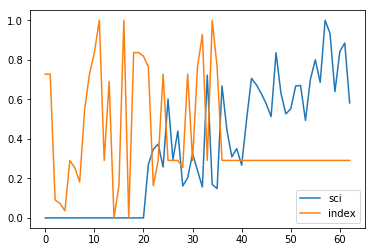

In [114]:
import matplotlib.pyplot as plt

sci_list=(sci_list-min(sci_list))/(max(sci_list)-min(sci_list))
index_list=np.array(index_list)
index_list=(index_list-min(index_list))/(max(index_list)-min(index_list))


plt.plot(range(len(sci_list)),sci_list,label='sci')
plt.plot(range(len(sci_list)),index_list,label='index')

plt.legend()
plt.show()

### 0-1normal many times

In [87]:
### import things
import pandas as pd
import copy
import seaborn as sns
import time

### read form the csv doc
data_train = pd.read_csv('train.csv')  
data_test = pd.read_csv('test.csv')
### trans to array
train_array = np.array(data_train)
test_array = np.array(data_test)
###############hyper parameter
use_normA=0
use_normy=0
###############hyper parameter

###############functions

### determin the x_tilda
def cp(x):
    return copy.deepcopy(x)

### get w_tilda
def compute_w_tilda(iters_inner,w_prev,ww_prev,all_or_one='mix',alpha=0.8,beta=0.2):
    if all_or_one=='all':
        w_tilda=cp(ww_prev)/iters_inner
    elif all_or_one=='one':
        w_tilda=cp(w_prev)
    elif all_or_one=='mix':
        w_tilda= cp(alpha*(w_prev)+beta*(ww_prev/iters_inner))
    return w_tilda

### get the data matrix A
def get_A(use_normA,train_array):
    if use_normA==1: 
        A_before_norm = train_array
        A=np.empty(np.shape(A_before_norm))
        for i in range(np.shape(A_before_norm)[1]):
            temp=A_before_norm[:,i]/np.linalg.norm(A_before_norm[:,i])
            A[:,i]=temp
    else:
        A = train_array
    return A

### get alpha 
def compute_alpha(A,lamb):
    L_max=0.25*max(sum(A*A))
    alpha=0.15/(L_max+lamb)
    return alpha

def get_xx_0():
    xx_0=np.zeros([85*67,67])
    for i in range(67):
        xx_0[i*85:i*85+85][:,i]=1
    return xx_0

def compute_res(y,x_phi,lamb):
    return sum((y-A.dot(x_phi))*(y-A.dot(x_phi)))
    
def get_index_min(xx_0,w_tilda):
    res_min=1e9
    for m in range(np.shape(xx_0)[1]):
        temp=xx_0[:,m].reshape(5695,1)
        x_phi=w_tilda*temp
        res=compute_res(y,x_phi,lamb)
        if res<res_min:
            res_min=res
            index_min=m
    return index_min

def compute_sci(xx_0,w):
    w_l1=np.linalg.norm(w,ord=1)
    temp_max=1e-9
    for m in range(np.shape(xx_0)[1]):
        temp=xx_0[:,m].reshape(5695,1)
        x_phi=w_tilda*temp
        x_phi_l1=np.linalg.norm(x_phi,ord=1)
        if x_phi_l1>temp_max:
            temp_max=x_phi_l1
    return (67*(temp_max/w_l1)-1)/(67-1)



###############functions


### process the A to be norm or not
AA=get_A(use_normA,train_array)
[d,n] = AA.shape

### A 归一化

A = np.zeros(np.shape(AA))
for i in range(np.shape(A)[1]):
    A[:,i]=(AA[:,i]-min(AA[:,i]))/(max(AA[:,i])-min(AA[:,i]))


### aha! same as the lambda, the L-1 norm coefficent
lamb=0.8e-3

### the learning rate 0.15/(the proxi-L constant)
alpha=compute_alpha(A,lamb)

### loops
iters_outer=3
iters_inner=2*d

### count the number bingo
right=0

xx_0=get_xx_0()

for k in range(100):
    rand_index=np.random.randint(85*67)
#     rand_index=4971 ##2383
    rand_who=int(rand_index/85)
    print('k many loops',k)

    #### which y version you use, norm processed or the plain one 
    if use_normy==1:
        temp_y = test_array[:,rand_index].reshape(d,1)
        y=np.empty(np.shape(temp_y))
        y=temp_y/np.linalg.norm(temp_y)
    else:
        y=test_array[:,rand_index].reshape(d,1)
    y=(y-min(y))/(max(y)-min(y))


    ### initialize the two ws
    w_prev=np.array(np.zeros([n,1]))
    w_tilda=np.array(np.zeros([n,1]))



    for i in range(iters_outer):
        print('i',i)
        mu=(-A.T).dot(y-A.dot(w_tilda))/d
        ##small loop
        for j in range(iters_inner):
            ### choose a rand one from d 
            idx=np.random.randint(0,d)
            ### A transpose, need reshape
            A_idx=A[idx].T.reshape(n,1)
            ### g_prev and tilda
            g_prev=(-A_idx).dot(y[idx]-(A[idx].reshape(1,n)).dot(w_prev)) 
            g_tilda=(-A_idx).dot(y[idx]-(A[idx].reshape(1,n)).dot(w_tilda)) 
            ### update the parameter
            w_prev=w_prev-alpha*(g_prev-g_tilda+mu)
            ### the soft thresholding
            temp=w_prev-lamb*alpha
            temp=(temp+abs(temp))/2
            w_prev=np.sign(w_prev)*temp
#             if j%100==0:
#                 index_min=index_min=get_index_min(xx_0,w_prev)
#                 print('index_min',index_min)


        ### assign the w_tilda for another loop    
        w_tilda=copy.deepcopy(w_prev)

    index_min=get_index_min(xx_0,w_tilda)


    print(('rand_index',rand_index))
    print(('randwho and index_min',rand_who,index_min))

    if rand_who == index_min:
        right=right+1



k many loops 0
i 0
i 1
('rand_index', 5619)
('randwho and index_min', 66, 66)
k many loops 1
i 0
i 1
('rand_index', 742)
('randwho and index_min', 8, 8)
k many loops 2
i 0
i 1
('rand_index', 177)
('randwho and index_min', 2, 2)
k many loops 3
i 0
i 1
('rand_index', 1890)
('randwho and index_min', 22, 22)
k many loops 4
i 0
i 1
('rand_index', 1468)
('randwho and index_min', 17, 17)
k many loops 5
i 0
i 1
('rand_index', 1588)
('randwho and index_min', 18, 18)
k many loops 6
i 0
i 1
('rand_index', 4869)
('randwho and index_min', 57, 57)
k many loops 7
i 0
i 1
('rand_index', 2780)
('randwho and index_min', 32, 32)
k many loops 8
i 0
i 1
('rand_index', 4115)
('randwho and index_min', 48, 48)
k many loops 9
i 0
i 1
('rand_index', 5010)
('randwho and index_min', 58, 60)
k many loops 10
i 0
i 1
('rand_index', 216)
('randwho and index_min', 2, 2)
k many loops 11
i 0
i 1
('rand_index', 4840)
('randwho and index_min', 56, 9)
k many loops 12
i 0
i 1
('rand_index', 2025)
('randwho and index_min', 2

In [79]:
y=(y-min(y))/(max(y)-min(y))
y

array([[0.01209677],
       [0.00806452],
       [0.00403226],
       ...,
       [1.        ],
       [0.95564516],
       [1.        ]])

In [88]:
right

90

In [71]:
A=[[1,2,3],[4,3,6],[7,8,9]]
A=np.array(A)
A.shape

A = np.zeros(np.shape(AA))
for i in range(np.shape(A)[1]):
    A[:,i]=(AA[:,i]-min(AA[:,i]))/(max(AA[:,i])-min(AA[:,i]))

AA


array([[0.        , 0.        , 0.        ],
       [0.5       , 0.16666667, 0.5       ],
       [1.        , 1.        , 1.        ]])

## vr

In [33]:
### import things
import pandas as pd
import copy 
import seaborn as sns
import time

### read form the csv doc
data_train = pd.read_csv('train.csv')  
data_test = pd.read_csv('test.csv')

### trans to array
train_array = np.array(data_train)
test_array = np.array(data_test)

###############hyper parameter
use_normA=0
use_normy=0
###############hyper parameter

###############functions

### determin the x_tilda
def cp(x):
    return copy.deepcopy(x)

### get w_tilda
def compute_w_tilda(iters_inner,w_prev,ww_prev,all_or_one='mix',alpha=0.8,beta=0.2):
    if all_or_one=='all':
        w_tilda=cp(ww_prev)/iters_inner
    elif all_or_one=='one':
        w_tilda=cp(w_prev)
    elif all_or_one=='mix':
        w_tilda= cp(alpha*(w_prev)+beta*(ww_prev/iters_inner))
    return w_tilda

### get the data matrix A
def get_A(use_normA,train_array):
    if use_normA==1: 
        A_before_norm = train_array
        A=np.empty(np.shape(A_before_norm))
        for i in range(np.shape(A_before_norm)[1]):
            temp=A_before_norm[:,i]/np.linalg.norm(A_before_norm[:,i])
            A[:,i]=temp
    else:
        A = train_array
    return A

### get alpha 
def compute_alpha(A,lamb):
    L_max=0.25*max(sum(A*A))
    alpha=0.15/(L_max+lamb)
    return alpha

def get_xx_0():
    xx_0=np.zeros([85*67,67])
    for i in range(67):
        xx_0[i*85:i*85+85][:,i]=1
    return xx_0

def compute_res(y,x_phi,lamb):
    return sum((y-A.dot(x_phi))*(y-A.dot(x_phi)))
    
def get_index_min(xx_0,w_tilda):
    res_min=1e9
    for m in range(np.shape(xx_0)[1]):
        temp=xx_0[:,m].reshape(5695,1)
        x_phi=w_tilda*temp
        res=compute_res(y,x_phi,lamb)
        if res<res_min:
            res_min=res
            index_min=m
    return index_min

def compute_sci(xx_0,w):
    w_l1=np.linalg.norm(w,ord=1)
    temp_max=1e-9
    for m in range(np.shape(xx_0)[1]):
        temp=xx_0[:,m].reshape(5695,1)
        x_phi=w_tilda*temp
        x_phi_l1=np.linalg.norm(x_phi,ord=1)
        if x_phi_l1>temp_max:
            temp_max=x_phi_l1
    return (67*(temp_max/w_l1)-1)/(67-1)



###############functions


### process the A to be norm or not
A=get_A(use_normA,train_array)
[d,n] = A.shape


### aha! same as the lambda, the L-1 norm coefficent
lamb=1e-3

### loops
iters_outer=20  # so many
iters_inner=3*d  # kd


### the learning rate 0.15/(the proxi-L constant+alpha)
alpha=compute_alpha(A,lamb)
### try bigger learning
# alpha=3*alpha

### make only part of the list to be none zero
xx_0=get_xx_0()


### count the number bingo when go through lots epochs
right=0


### choose a wrong one
rand_index=2297
#     print('rand_index',rand_index)
rand_who=int(rand_index/85)
#     print('rand_who',rand_who)

#### which y version you use, norm processed or the plain one 
if use_normy==1:
    temp_y = test_array[:,rand_index].reshape(d,1)
    y=np.empty(np.shape(temp_y))
    y=temp_y/np.linalg.norm(temp_y)
else:
    y=test_array[:,rand_index].reshape(d,1)

### initialize the two ws
w_prev=np.array(np.zeros([n,1]))
w_tilda=np.array(np.zeros([n,1]))
ww_prev=np.array(np.zeros([n,1]))


### big loop

for i in range(iters_outer):
    ### the vrsgd things
    print(i)
    tau=max(2/(i+2),0.1818) 
    alpha2=alpha/tau
    alpha1=lamb*alpha2
    ### compute the full gradient
    mu=(-A.T).dot(y-A.dot(w_tilda))/d
    ##small loop
    for j in range(iters_inner):
        ### choose a rand one from d 
        idx=np.random.randint(0,d)
        ### A transpose, need reshape
        A_idx=A[idx].T.reshape(n,1)
        ### g_prev and tilda
        g_prev=(-A_idx).dot(y[idx]-(A[idx].reshape(1,n)).dot(w_prev)) 
        g_tilda=(-A_idx).dot(y[idx]-(A[idx].reshape(1,n)).dot(w_tilda)) 
        ### update the parameter
        w_prev=w_prev-alpha2*(g_prev-g_tilda+mu)
        ### the soft thresholding
        temp=w_prev-alpha1
        temp=(temp+abs(temp))/2
        w_prev=np.sign(w_prev)*temp
        if j%100==0:
            index_min=index_min=get_index_min(xx_0,w_prev)
            print('index_min',index_min)
        
        ww_prev+=w_prev
        
    ### assign the w_tilda for another loop  3 kinds one or all or other
    w_tilda=compute_w_tilda(iters_inner,w_prev,ww_prev,'all')



index_min=get_index_min(xx_0,w_tilda)

print(('rand_index',rand_index))
print(('randwho and index_min',rand_who,index_min))

if rand_who == index_min:
    right=right+1
    



0
index_min 45
index_min 52
index_min 15
index_min 15
index_min 15
index_min 65
index_min 64
index_min 64
index_min 65
index_min 64
index_min 15
index_min 15


KeyboardInterrupt: 

In [28]:
1280/85

15.058823529411764

In [7]:
# import matplotlib.pyplot as plt

# plt.plot(time_list,res_list)
# plt.show()
# plt.plot(time_list,sci_list)
# plt.show()

## ka

In [35]:
### import things
import pandas as pd
import copy
import seaborn as sns
import time
### read form the csv doc
data_train = pd.read_csv('train.csv')  
data_test = pd.read_csv('test.csv')

### trans to array
train_array = np.array(data_train)
test_array = np.array(data_test)
###############hyper parameter
use_normA=0
use_normy=0
###############hyper parameter

###############functions

### determin the x_tilda
def cp(x):
    return copy.deepcopy(x)

### get w_tilda
def compute_w_tilda(iters_inner,w_prev,ww_prev,all_or_one='mix',alpha=0.8,beta=0.2):
    if all_or_one=='all':
        w_tilda=cp(ww_prev)/iters_inner
    elif all_or_one=='one':
        w_tilda=cp(w_prev)
    elif all_or_one=='mix':
        w_tilda= cp(alpha*(w_prev)+beta*(ww_prev/iters_inner))
    return w_tilda

### get the data matrix A
def get_A(use_normA,train_array):
    if use_normA==1: 
        A_before_norm = train_array
        A=np.empty(np.shape(A_before_norm))
        for i in range(np.shape(A_before_norm)[1]):
            temp=A_before_norm[:,i]/np.linalg.norm(A_before_norm[:,i])
            A[:,i]=temp
    else:
        A = train_array
    return A

### get alpha 
def compute_alpha(A,lamb):
    L_max=0.25*max(sum(A*A))
    alpha=0.15/(L_max+lamb)
    return alpha

def get_xx_0():
    xx_0=np.zeros([85*67,67])
    for i in range(67):
        xx_0[i*85:i*85+85][:,i]=1
    return xx_0

def compute_res(y,x_phi,lamb):
    return sum((y-A.dot(x_phi))*(y-A.dot(x_phi)))
    
def get_index_min(xx_0,w_tilda):
    res_min=1e9
    for m in range(np.shape(xx_0)[1]):
        temp=xx_0[:,m].reshape(5695,1)
        x_phi=w_tilda*temp
        res=compute_res(y,x_phi,lamb)
        if res<res_min:
            res_min=res
            index_min=m
    return index_min

def compute_sci(xx_0,w):
    w_l1=np.linalg.norm(w,ord=1)
    temp_max=1e-9
    for m in range(np.shape(xx_0)[1]):
        temp=xx_0[:,m].reshape(5695,1)
        x_phi=w_tilda*temp
        x_phi_l1=np.linalg.norm(x_phi,ord=1)
        if x_phi_l1>temp_max:
            temp_max=x_phi_l1
    return (67*(temp_max/w_l1)-1)/(67-1)



###############functions


### process the A to be norm or not
A=get_A(0,train_array)
[d,n] = A.shape

### aha! same as the lambda, the L-1 norm coefficent
lamb=1e-3

### L-max
Lmax=(0.25*max(sum(A*A)))
Lmax=3*Lmax
### the learning rate 0.15/(the proxi-L constant)
# alpha=0.15/(0.25*max(sum(A*A)))

### tau1 
tau1=lamb/Lmax

### loops
iters_outer=20
iters_inner=2*d

### make only part of the list to be none zero
xx_0=get_xx_0()


### count the number bingo
right=0



rand_index=1831
rand_who=int(rand_index/85)

#### which y version you use, norm processed or the plain one 
if use_normy==1:
    temp_y = test_array[:,rand_index].reshape(d,1)
    y=np.empty(np.shape(temp_y))
    y=temp_y/np.linalg.norm(temp_y)
else:
    y=test_array[:,rand_index].reshape(d,1)

### initialize the two ws
w_tilda=np.array(np.zeros([n,1]))
x_prev=np.array(np.zeros([n,1]))
y_prev=np.array(np.zeros([n,1]))


### count the time 
for i in range(iters_outer):
    print(i)
    mu=(-A.T).dot(y-A.dot(w_tilda))/d
    tau=2/(i+4)
    tau=max(tau,0.1818)
    alpha=0.1/(tau*Lmax)
    tau2=lamb*alpha
    ##small loop
    for j in range(iters_inner):
        ### choose a rand one from d 
        idx=np.random.randint(0,d)

        ### updata w_prev
        w_prev=tau*x_prev+0.5*w_tilda+(0.5-tau)*y_prev

        ### A transpose, need reshape
        A_idx=A[idx].T.reshape(n,1)
        ### g_prev and tilda
        g_prev=(-A_idx).dot(y[idx]-(A[idx].reshape(1,n)).dot(w_prev)) 
        g_tilda=(-A_idx).dot(y[idx]-(A[idx].reshape(1,n)).dot(w_tilda)) 
        ### update x_prev
        g_svrg=g_prev-g_tilda+mu
        x_prev=x_prev-alpha*(g_svrg)
        
        ### the soft thresholding
        temp=w_prev-tau1
        temp=(temp+abs(temp))/2
        w_prev=np.sign(w_prev)*temp
        if j%100==0:
            index_min=index_min=get_index_min(xx_0,w_prev)
            print('index_min',index_min)


    ### assign the w_tilda for another loop  2 versions  
    w_tilda=1*w_prev


index_min=get_index_min(xx_0,w_tilda)


print(('rand_index',rand_index))
print(('randwho and index_min',rand_who,index_min))

if rand_who == index_min:
    right=right+1





0
index_min 0
index_min 60
index_min 60
index_min 64
index_min 28
index_min 64
index_min 49
index_min 64
index_min 51
index_min 51
index_min 28
index_min 51
index_min 51
index_min 51
index_min 29
index_min 29
index_min 29
index_min 29
index_min 29
index_min 29
index_min 29
1
index_min 29
index_min 29
index_min 29


KeyboardInterrupt: 

## mig

### one time

In [38]:
### import things
import pandas as pd
import copy
import seaborn as sns
import time

### read form the csv doc
data_train = pd.read_csv('train.csv')  
data_test = pd.read_csv('test.csv')
### trans to array
train_array = np.array(data_train)
test_array = np.array(data_test)
###############hyper parameter
use_normA=0
use_normy=0
###############hyper parameter

###############functions

### determin the x_tilda
def cp(x):
    return copy.deepcopy(x)

### get w_tilda
def compute_w_tilda(iters_inner,w_prev,ww_prev,all_or_one='mix',alpha=0.8,beta=0.2):
    if all_or_one=='all':
        w_tilda=cp(ww_prev)/iters_inner
    elif all_or_one=='one':
        w_tilda=cp(w_prev)
    elif all_or_one=='mix':
        w_tilda= cp(alpha*(w_prev)+beta*(ww_prev/iters_inner))
    return w_tilda

### get the data matrix A
def get_A(use_normA,train_array):
    if use_normA==1: 
        A_before_norm = train_array
        A=np.empty(np.shape(A_before_norm))
        for i in range(np.shape(A_before_norm)[1]):
            temp=A_before_norm[:,i]/np.linalg.norm(A_before_norm[:,i])
            A[:,i]=temp
    else:
        A = train_array
    return A

### get alpha 
def compute_alpha(A,lamb):
    L_max=0.25*max(sum(A*A))
    alpha=0.15/(L_max+lamb)
    return alpha

def get_xx_0():
    xx_0=np.zeros([85*67,67])
    for i in range(67):
        xx_0[i*85:i*85+85][:,i]=1
    return xx_0

def compute_res(y,x_phi,lamb):
    return sum((y-A.dot(x_phi))*(y-A.dot(x_phi)))
    
def get_index_min(xx_0,w_tilda):
    res_min=1e9
    for m in range(np.shape(xx_0)[1]):
        temp=xx_0[:,m].reshape(5695,1)
        x_phi=w_tilda*temp
        res=compute_res(y,x_phi,lamb)
        if res<res_min:
            res_min=res
            index_min=m
    return index_min

def compute_sci(xx_0,w):
    w_l1=np.linalg.norm(w,ord=1)
    temp_max=1e-9
    for m in range(np.shape(xx_0)[1]):
        temp=xx_0[:,m].reshape(5695,1)
        x_phi=w_tilda*temp
        x_phi_l1=np.linalg.norm(x_phi,ord=1)
        if x_phi_l1>temp_max:
            temp_max=x_phi_l1
    return (67*(temp_max/w_l1)-1)/(67-1)



###############functions


### process the A to be norm or not
A=get_A(use_normA,train_array)
[d,n] = A.shape
L_max=0.25*max(sum(A*A))

### aha! same as the lambda, the L-1 norm coefficent
# lamb=1e-5
lamb=1e-3

### the learning rate 0.15/(the proxi-L constant)
alpha=compute_alpha(A,lamb)

### loops
iters_outer=20
iters_inner=2*d

### count the number bingo
right=0

xx_0=get_xx_0()

rand_index=703
#     print('rand_index',rand_index)
rand_who=int(rand_index/85)
#     print('rand_who',rand_who)

#### which y version you use, norm processed or the plain one 
if use_normy==1:
    temp_y = test_array[:,rand_index].reshape(d,1)
    y=np.empty(np.shape(temp_y))
    y=temp_y/np.linalg.norm(temp_y)
else:
    y=test_array[:,rand_index].reshape(d,1)

### initialize the two ws
w_prev=np.array(np.zeros([n,1]))
w_tilda=np.array(np.zeros([n,1]))
ww_prev=np.array(np.zeros([n,1]))


for i in range(iters_outer):
    print(i)
    ### full grad
    mu=(-A.T).dot(y-A.dot(w_tilda))/d
    ### hyper params
    theta=2/(i+3)
    ita=1/(4*L_max*theta)
    ita=min(1/L_max,ita)
    ##small loop
    for j in range(iters_inner):
        ### choose a rand one from d 
        idx=np.random.randint(0,d)
        ### A transpose, need reshape
        A_idx=A[idx].T.reshape(n,1)
        ### compute y as the combine of w_prev and w_tilda
        y_w=theta*w_prev+(1-theta)*w_tilda
        ### g_prev and tilda
#         g_prev=(-A_idx).dot(y[idx]-(A[idx].reshape(1,n)).dot(w_prev)) 
        ### compute with y_w instead of w_prev
        g_prev=(-A_idx).dot(y[idx]-(A[idx].reshape(1,n)).dot(y_w)) 
        g_tilda=(-A_idx).dot(y[idx]-(A[idx].reshape(1,n)).dot(w_tilda)) 
        ### update the parameter
        w_prev=w_prev-ita*(g_prev-g_tilda+mu)
        ### the soft thresholding
        temp=w_prev-ita*lamb
        temp=(temp+abs(temp))/2
        w_prev=np.sign(w_prev)*temp
        if j%100==0:
            index_min=index_min=get_index_min(xx_0,w_prev)
            print('index_min',index_min)
        ### sum w_prev
        ww_prev+=w_prev

        
     
    ### mig combined w_tilda
#     w_tilda=theta*(ww_prev/iters_inner)+(1-theta)*w_tilda
    w_tilda=cp(w_prev)

index_min=get_index_min(xx_0,w_tilda)

        
print(('rand_index',rand_index))
print(('randwho and index_min',rand_who,index_min))

if rand_who == index_min:
    right=right+1
    


    



0
index_min 45
index_min 19
index_min 65
index_min 45
index_min 19
index_min 50
index_min 45
index_min 15
index_min 45
index_min 64
index_min 66
index_min 64
index_min 47
index_min 47
index_min 48
index_min 64
index_min 64
index_min 19
index_min 60
index_min 64
index_min 60
1
index_min 64
index_min 56
index_min 48
index_min 50
index_min 48
index_min 56
index_min 66
index_min 50
index_min 11
index_min 45
index_min 45
index_min 48


KeyboardInterrupt: 

### many times

In [78]:
### import things
import pandas as pd
import copy
import seaborn as sns
import time

### read form the csv doc
data_train = pd.read_csv('train.csv')  
data_test = pd.read_csv('test.csv')
### trans to array
train_array = np.array(data_train)
test_array = np.array(data_test)
###############hyper parameter
use_normA=0
use_normy=0
###############hyper parameter

###############functions

### determin the x_tilda
def cp(x):
    return copy.deepcopy(x)

### get w_tilda
def compute_w_tilda(iters_inner,w_prev,ww_prev,all_or_one='mix',alpha=0.8,beta=0.2):
    if all_or_one=='all':
        w_tilda=cp(ww_prev)/iters_inner
    elif all_or_one=='one':
        w_tilda=cp(w_prev)
    elif all_or_one=='mix':
        w_tilda= cp(alpha*(w_prev)+beta*(ww_prev/iters_inner))
    return w_tilda

### get the data matrix A
def get_A(use_normA,train_array):
    if use_normA==1: 
        A_before_norm = train_array
        A=np.empty(np.shape(A_before_norm))
        for i in range(np.shape(A_before_norm)[1]):
            temp=A_before_norm[:,i]/np.linalg.norm(A_before_norm[:,i])
            A[:,i]=temp
    else:
        A = train_array
    return A

### get alpha 
def compute_alpha(A,lamb):
    L_max=0.25*max(sum(A*A))
    alpha=0.15/(L_max+lamb)
    return alpha

def get_xx_0():
    xx_0=np.zeros([85*67,67])
    for i in range(67):
        xx_0[i*85:i*85+85][:,i]=1
    return xx_0

def compute_res(y,x_phi,lamb):
    return sum((y-A.dot(x_phi))*(y-A.dot(x_phi)))
    
def get_index_min(xx_0,w_tilda):
    res_min=1e9
    for m in range(np.shape(xx_0)[1]):
        temp=xx_0[:,m].reshape(5695,1)
        x_phi=w_tilda*temp
        res=compute_res(y,x_phi,lamb)
        if res<res_min:
            res_min=res
            index_min=m
            print('min_index_now',index_min)
    return index_min

def compute_sci(xx_0,w):
    w_l1=np.linalg.norm(w,ord=1)
    temp_max=1e-9
    for m in range(np.shape(xx_0)[1]):
        temp=xx_0[:,m].reshape(5695,1)
        x_phi=w_tilda*temp
        x_phi_l1=np.linalg.norm(x_phi,ord=1)
        if x_phi_l1>temp_max:
            temp_max=x_phi_l1
    return (67*(temp_max/w_l1)-1)/(67-1)



###############functions


### process the A to be norm or not
A=get_A(use_normA,train_array)
[d,n] = A.shape
L_max=0.25*max(sum(A*A))

### aha! same as the lambda, the L-1 norm coefficent
# lamb=1e-5
lamb=1e-3

### the learning rate 0.15/(the proxi-L constant)
alpha=compute_alpha(A,lamb)

### loops
iters_outer=3
iters_inner=3*d

### count the number bingo
right=0

xx_0=get_xx_0()



for k in range(100):
    rand_index=np.random.randint(85*67)
#     print('rand_index',rand_index)
    rand_who=int(rand_index/85)
#     print('rand_who',rand_who)

    #### which y version you use, norm processed or the plain one 
    if use_normy==1:
        temp_y = test_array[:,rand_index].reshape(d,1)
        y=np.empty(np.shape(temp_y))
        y=temp_y/np.linalg.norm(temp_y)
    else:
        y=test_array[:,rand_index].reshape(d,1)

    ### initialize the two ws
    w_prev=np.array(np.zeros([n,1]))
    w_tilda=np.array(np.zeros([n,1]))
    ww_prev=np.array(np.zeros([n,1]))

    for i in range(iters_outer):
        mu=(-A.T).dot(y-A.dot(w_tilda))/d
        theta=2/(i+4)
        ita=1/(4*L_max*theta)
        ##small loop
        for j in range(iters_inner):
            ### choose a rand one from d 
            idx=np.random.randint(0,d)
            ### A transpose, need reshape
            A_idx=A[idx].T.reshape(n,1)
            ### compute y as the combine of w_prev and w_tilda
            y_w=theta*w_prev+(1-theta)*w_tilda
            ### g_prev and tilda
    #         g_prev=(-A_idx).dot(y[idx]-(A[idx].reshape(1,n)).dot(w_prev)) 
            ### compute with y_w instead of w_prev
            g_prev=(-A_idx).dot(y[idx]-(A[idx].reshape(1,n)).dot(y_w)) 
            g_tilda=(-A_idx).dot(y[idx]-(A[idx].reshape(1,n)).dot(w_tilda)) 
            ### update the parameter
            w_prev=w_prev-ita*(g_prev-g_tilda+mu)
            ### the soft thresholding
            temp=w_prev-ita*lamb
            temp=(temp+abs(temp))/2
            w_prev=np.sign(w_prev)*temp
            ### sum w_prev
            ww_prev+=w_prev
        w_tilda=theta*(ww_prev/iters_inner)+(1-theta)*w_tilda
    print('***'*100)
    index_min=get_index_min(xx_0,w_tilda)
#     if rand_who != index_min:
    print('the pic',rand_index)
    print(('rand_index',rand_index))
    print(('randwho and index_min',rand_who,index_min))

    if rand_who == index_min:
        right=right+1
    

# time_list_name="npy/mig"+'time_list'+'inner'+str(iters_inner)+'outer'+str(iters_outer)+'.npy'
# res_list_name="npy/mig"+'res_list'+'inner'+str(iters_inner)+'outer'+str(iters_outer)+'.npy'
# sci_list_name="npy/mig"+'sci_list'+'inner'+str(iters_inner)+'outer'+str(iters_outer)+'.npy'
# np.save(time_list_name,time_list)
# np.save(res_list_name,res_list)
# np.save(sci_list_name,sci_list)
    



************************************************************************************************************************************************************************************************************************************************************************************************************
min_index_now 0
min_index_now 3
min_index_now 4
min_index_now 15
min_index_now 28
min_index_now 45
min_index_now 52
the pic 4465
('rand_index', 4465)
('randwho and index_min', 52, 52)
************************************************************************************************************************************************************************************************************************************************************************************************************
min_index_now 0
min_index_now 8
min_index_now 10
min_index_now 15
min_index_now 19
min_index_now 43
the pic 4971
('rand_index', 4971)
('randwho and index_min', 58, 43)
**********************************************

In [79]:
right

69

## draw

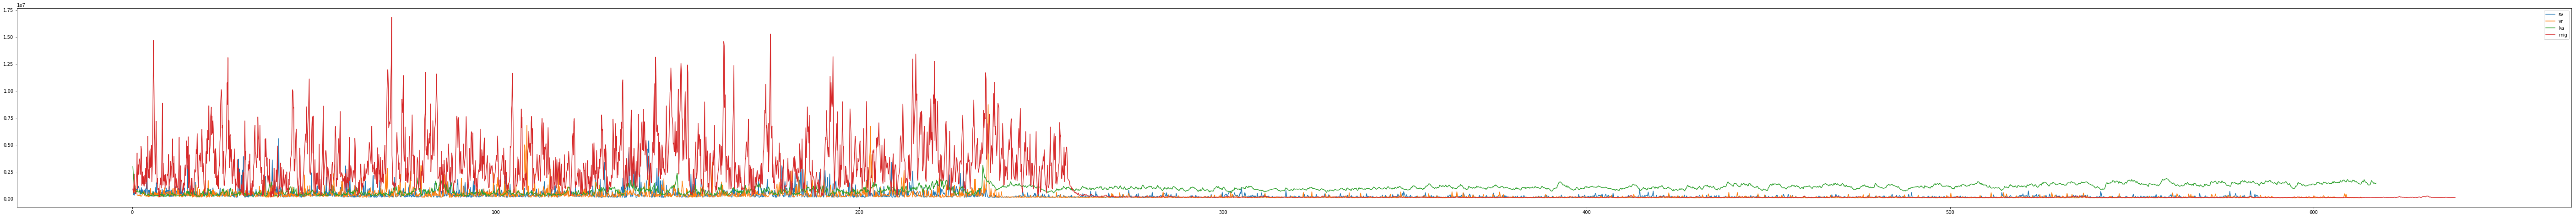

In [19]:
time_vr="npy/vrsgd"+'time_list'+'inner'+str(iters_inner)+'outer'+str(iters_outer)+'.npy'
res_vr="npy/vrsgd"+'res_list'+'inner'+str(iters_inner)+'outer'+str(iters_outer)+'.npy'
sci_vr="npy/vrsgd"+'sci_list'+'inner'+str(iters_inner)+'outer'+str(iters_outer)+'.npy'

time_ka="npy/ka"+'time_list'+'inner'+str(iters_inner)+'outer'+str(iters_outer)+'.npy'
res_ka="npy/ka"+'res_list'+'inner'+str(iters_inner)+'outer'+str(iters_outer)+'.npy'
sci_ka="npy/ka"+'sci_list'+'inner'+str(iters_inner)+'outer'+str(iters_outer)+'.npy'

time_sv="npy/sv1"+'time_list'+'inner'+str(iters_inner)+'outer'+str(iters_outer)+'.npy'
res_sv="npy/sv1"+'res_list'+'inner'+str(iters_inner)+'outer'+str(iters_outer)+'.npy'
sci_sv="npy/sv1"+'sci_list'+'inner'+str(iters_inner)+'outer'+str(iters_outer)+'.npy'

time_mig="npy/mig"+'time_list'+'inner'+str(iters_inner)+'outer'+str(iters_outer)+'.npy'
res_mig="npy/mig"+'res_list'+'inner'+str(iters_inner)+'outer'+str(iters_outer)+'.npy'
sci_mig="npy/mig"+'sci_list'+'inner'+str(iters_inner)+'outer'+str(iters_outer)+'.npy'

import matplotlib.pyplot as plt
time_sv=np.load(time_sv)
time_vr=np.load(time_vr)
time_ka=np.load(time_ka)
time_mig=np.load(time_mig)

res_sv=np.load(res_sv)
res_vr=np.load(res_vr)
res_ka=np.load(res_ka)
res_mig=np.load(res_mig)

sci_sv=np.load(sci_sv)
sci_vr=np.load(sci_vr)
sci_ka=np.load(sci_ka)
sci_mig=np.load(sci_mig)

plt.figure(figsize=(100,8))
plt.plot(time_sv,res_sv,label='sv')
plt.plot(time_vr,res_vr,label='vr')
plt.plot(time_ka,res_ka,label='ka')
plt.plot(time_mig,res_mig,label='mig')


plt.legend()

plt.show()



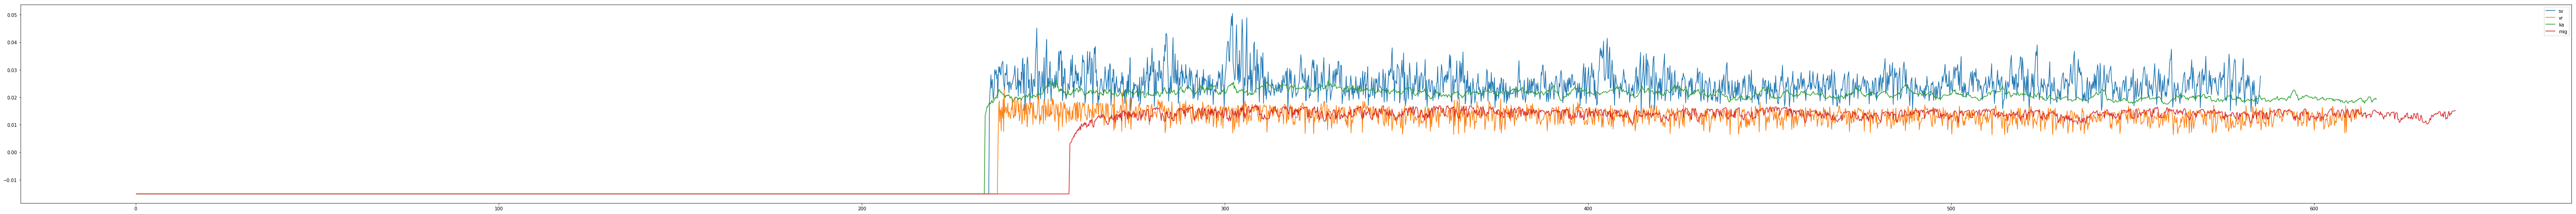

In [20]:
plt.figure(figsize=(100,8))
plt.plot(time_sv,sci_sv,label='sv')
plt.plot(time_vr,sci_vr,label='vr')
plt.plot(time_ka,sci_ka,label='ka')
plt.plot(time_mig,sci_mig,label='mig')


plt.legend()

plt.show()

In [16]:
a=[1,2,3]
b=1*a
b[2]=999
b

[1, 2, 999]

## many time no hot with mig

In [47]:
### import things
import pandas as pd
import copy
### read form the csv doc
data_train = pd.read_csv('train.csv')  
data_test = pd.read_csv('test.csv')
### trans to array
train_array = np.array(data_train)
test_array = np.array(data_test)
###############hyper parameter
use_normA=0
use_normy=0
###############hyper parameter

### process the A to be norm or not
if use_normA==1: 
    A_before_norm = train_array
    A=np.empty(np.shape(A_before_norm))
    for i in range(np.shape(A_before_norm)[1]):
        temp=A_before_norm[:,i]/np.linalg.norm(A_before_norm[:,i])
        A[:,i]=temp
else:
    A = train_array

### the A shape
[d,n] = A.shape


### aha! same as the lambda, the L-1 norm coefficent
lamb=1e-4

### the learning rate 0.15/(the proxi-L constant)
L_max=0.25*max(sum(A*A))
alpha=0.15/(0.25*max(sum(A*A)))

### loops
iters_outer=3
iters_inner=2*d

### count the number bingo
right=0

xx_0=np.zeros([85*67,67])
for i in range(67):
    xx_0[i*85:i*85+85][:,i]=1

for k in range(100):
    rand_index=np.random.randint(85*67)
#     print('rand_index',rand_index)
    rand_who=int(rand_index/85)
#     print('rand_who',rand_who)
    
    #### which y version you use, norm processed or the plain one 
    if use_normy==1:
        temp_y = test_array[:,rand_index].reshape(d,1)
        y=np.empty(np.shape(temp_y))
        y=temp_y/np.linalg.norm(temp_y)
    else:
        y=test_array[:,rand_index].reshape(d,1)
    
    ### initialize the two ws
    w_prev=np.array(np.zeros([n,1]))
    w_tilda=np.array(np.zeros([n,1]))
    ww_prev=np.array(np.zeros([n,1]))
    ### big loop
    for i in range(iters_outer):
        mu=(-A.T).dot(y-A.dot(w_tilda))/d
        theta=2/(i+4)
        ita=1/(4*L_max*theta)
        ##small loop
        for j in range(iters_inner):
            ### choose a rand one from d 
            idx=np.random.randint(0,d)
            ### A transpose, need reshape
            A_idx=A[idx].T.reshape(n,1)
            ### y_w
            y_w=theta*w_prev+(1-theta)*w_tilda
            ### g_prev and tilda
            g_prev=(-A_idx).dot(y[idx]-(A[idx].reshape(1,n)).dot(y_w)) 
            g_tilda=(-A_idx).dot(y[idx]-(A[idx].reshape(1,n)).dot(w_tilda)) 
            ### update the parameter
            w_prev=w_prev-alpha*(g_prev-g_tilda+mu)
            ### the soft thresholding
            temp=w_prev-lamb*alpha
            temp=(temp+abs(temp))/2
            w_prev=np.sign(w_prev)*temp
            ## sum the w_prev
            ww_prev=ww_prev+w_prev
        ### assign the w_tilda for another loop mig version
#         w_tilda=copy.deepcopy(w_prev)
        w_tilda=theta*(ww_prev/iters_inner)+(1-theta)*w_tilda



        
    res_min=1e9
    for i in range(np.shape(xx_0)[1]):
        temp=xx_0[:,i].reshape(5695,1)
        x_phi=w_tilda*temp
        res=sum((y-A.dot(x_phi))*(y-A.dot(x_phi)))
        if res<res_min:
            res_min=res
            index_min=i


    print('randwho and index_min',rand_who,index_min)
#     print('detect and rand_who',detect,rand_who)
#     print('rand_index',rand_index)
#     print('rand_who',rand_who)
#     print('*'*80)
#     if detect == rand_who:
#         right=right+1

    if rand_who == index_min:
        right=right+1


    
    
    

randwho and index_min 26 50
randwho and index_min 24 24
randwho and index_min 1 66
randwho and index_min 65 65
randwho and index_min 2 2
randwho and index_min 44 43
randwho and index_min 40 40
randwho and index_min 35 35
randwho and index_min 57 57
randwho and index_min 16 45
randwho and index_min 45 45
randwho and index_min 9 9
randwho and index_min 61 61
randwho and index_min 51 51
randwho and index_min 41 28
randwho and index_min 44 65
randwho and index_min 16 16
randwho and index_min 13 13
randwho and index_min 29 29
randwho and index_min 59 59
randwho and index_min 59 59
randwho and index_min 57 57
randwho and index_min 35 35
randwho and index_min 9 9
randwho and index_min 19 19
randwho and index_min 51 51
randwho and index_min 12 49
randwho and index_min 34 34
randwho and index_min 13 13
randwho and index_min 46 46
randwho and index_min 20 20


KeyboardInterrupt: 

## Dalm

In [44]:
import pandas as pd
import copy
import seaborn as sns
import time
from numpy.linalg import norm


def SolveDALM(A,b,xG):

    lammda = 0
    maxIter = 2
    
    m,n = A.shape
    At = A.transpose()
    
    beta = 0.1*norm(b,ord=1)/m
    betaInv = 1/beta
    
    G = np.dot(A,At)+np.eye(m)*lammda/beta
    invG = np.linalg.inv(G)
    
    nIter = 0
    
    y = np.zeros([m,1])
    x = np.zeros([n,1])
    
    converged_main = 0
    

    
    temp = np.dot(At,y)
    f = norm(x,ord =1)
    while not converged_main:
        
        nIter += 1
        
        x_old = x
        
        #update z
        temp1 = temp+np.dot(x,betaInv)
        z = np.sign(temp1)*np.min(np.hstack((abs(temp1), \
            np.ones(temp1.shape))),1).reshape(len(temp1),1)
        
        # compute A' * y
        y = np.dot(invG,np.dot(A,z-x*betaInv)+b*betaInv)
        temp = np.dot(At,y)
        
        #update x
        x = x-beta*(z-temp)
        

        if nIter < maxIter:
            converged_main = 1
            

    return x

### get the data matrix A
def get_A(use_normA,train_array):
    if use_normA==1: 
        A_before_norm = train_array
        A=np.empty(np.shape(A_before_norm))
        for i in range(np.shape(A_before_norm)[1]):
            temp=A_before_norm[:,i]/np.linalg.norm(A_before_norm[:,i])
            A[:,i]=temp
    else:
        A = train_array
    return A
        
def get_xx_0():
    xx_0=np.zeros([85*67,67])
    for i in range(67):
        xx_0[i*85:i*85+85][:,i]=1
    return xx_0

def compute_res(y,x_phi,lamb):
    return sum((y-A.dot(x_phi))*(y-A.dot(x_phi)))
    
def get_index_min(xx_0,w_tilda):
    res_min=1e9
    for m in range(np.shape(xx_0)[1]):
        temp=xx_0[:,m].reshape(5695,1)
        x_phi=w_tilda*temp
        res=compute_res(y,x_phi,lamb)
        if res<res_min:
            res_min=res
            index_min=m
    return index_min

def compute_sci(xx_0,w):
    w_l1=np.linalg.norm(w,ord=1)
    temp_max=1e-9
    for m in range(np.shape(xx_0)[1]):
        temp=xx_0[:,m].reshape(5695,1)
        x_phi=w_tilda*temp
        x_phi_l1=np.linalg.norm(x_phi,ord=1)
        if x_phi_l1>temp_max:
            temp_max=x_phi_l1
    return (67*(temp_max/w_l1)-1)/(67-1)



### read form the csv doc
data_train = pd.read_csv('train.csv')  
data_test = pd.read_csv('test.csv')
### trans to array
train_array = np.array(data_train)
test_array = np.array(data_test)
### tune hyper params
use_normA=0
use_normy=0
### get A
A=get_A(0,train_array)
[d,n] = A.shape
### get y
rand_index=2383
#     print('rand_index',rand_index)
rand_who=int(rand_index/85)
#     print('rand_who',rand_who)

#### which y version you use, norm processed or the plain one 
if use_normy==1:
    temp_y = test_array[:,rand_index].reshape(d,1)
    y=np.empty(np.shape(temp_y))
    y=temp_y/np.linalg.norm(temp_y)
else:
    y=test_array[:,rand_index].reshape(d,1)


x = np.zeros([n,1])


x = SolveDALM(A,y,x)


In [45]:
lamb=0
def compute_res(y,x_phi,lamb):
    return sum((y-A.dot(x_phi))*(y-A.dot(x_phi)))

def get_xx_0():
    xx_0=np.zeros([85*67,67])
    for i in range(67):
        xx_0[i*85:i*85+85][:,i]=1
    return xx_0

def get_index_min(xx_0,w_tilda):
    res_min=1e9
    for m in range(np.shape(xx_0)[1]):
        temp=xx_0[:,m].reshape(5695,1)
        x_phi=w_tilda*temp
        res=compute_res(y,x_phi,lamb)
        if res<res_min:
            res_min=res
            index_min=m
    return index_min



In [46]:
xx_0=get_xx_0()
get_index_min(xx_0,x)

28